In [1]:
#Automobile fraud insurance  data set
import pandas as pd
import numpy as np
data=pd.read_csv(r'C:\DataSet\Automobile_insurance_fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [2]:

data.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [4]:
#Since there are NA values in the dataset, let's drop them and parse date columns as DateTime. 
#Also drop unwanted columns by modifying read_csv
data = pd.read_csv(r'C:\DataSet\Automobile_insurance_fraud.csv', 
                   usecols= ['months_as_customer', 
                             'age', 
                             'policy_bind_date',
                             'policy_state',
                             'policy_csl',
                             'policy_deductable',
                             'policy_annual_premium',
                             'umbrella_limit',
                             'insured_zip',
                             'insured_sex',
                             'insured_education_level',
                             'insured_occupation',
                             'insured_hobbies',
                             'insured_relationship',
                             'capital-gains',
                             'capital-loss',
                             'incident_date',
                             'incident_type',
                             'collision_type',
                             'incident_severity',
                             'authorities_contacted',
                             'incident_state',
                             'incident_city',
                             'incident_hour_of_the_day',
                             'number_of_vehicles_involved',
                             'property_damage',
                             'bodily_injuries',
                             'witnesses',
                             'police_report_available',
                             'total_claim_amount',
                             'injury_claim',
                             'property_claim',
                             'vehicle_claim',
                             'auto_year',
                             'fraud_reported'], 
                   na_values=['?'], na_filter = True, parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [5]:
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [6]:
data.shape

(1000, 35)

In [7]:
#Replacing NaN in all three columns individually

data['collision_type'].fillna(data['collision_type'].value_counts().index[0], inplace = True)

In [8]:
data['property_damage'].fillna(data['property_damage'].value_counts().index[0], inplace = True)

In [9]:
data['police_report_available'].fillna(data['police_report_available'].value_counts().index[0], inplace = True)

In [10]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,0,0,NO,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N


In [11]:
#Checking whether any column is left with NaN
data.isna().sum()


months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [12]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

In [13]:
#Fraud cases being reported

data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [14]:
data.age.max()

64

In [15]:

data['age_bins'] = pd.cut(data.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [16]:
age_vs_fraud = pd.crosstab(data['age_bins'], data['fraud_reported'])

In [17]:
#AGE VS FRAUD 
age_vs_fraud

fraud_reported,N,Y
age_bins,,
11-20,1,1
21-30,150,45
31-40,302,94
41-50,221,72
51-60,66,30
61-70,13,5


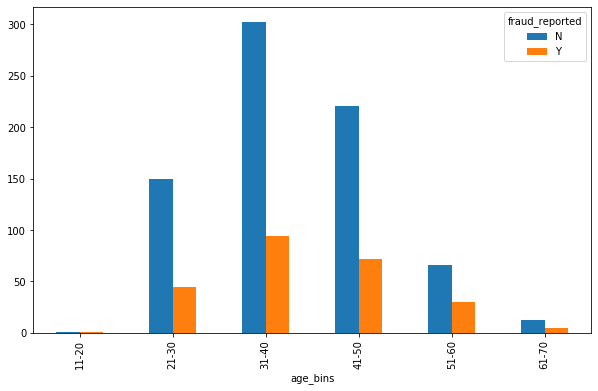

In [18]:
#VISUAL PLOTTING 

age_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [19]:
#incident severity v/s fraud reported

incisev_vs_fraud = pd.crosstab(data['incident_severity'], data['fraud_reported'])
incisev_vs_fraud

fraud_reported,N,Y
incident_severity,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


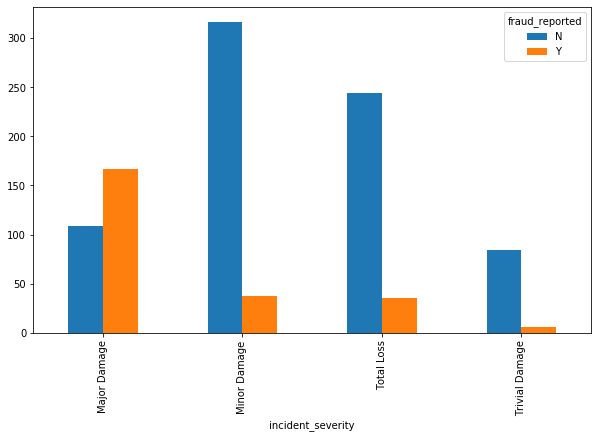

In [20]:
incisev_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [21]:
#total insurance claims v/s fraud reported.
print(data.total_claim_amount.min())
print(data.total_claim_amount.max())

100
114920


In [22]:
data['total_claim_bins'] = pd.cut(data.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300'])

In [23]:
total_claim_vs_fraud = pd.crosstab(data.total_claim_bins, data.fraud_reported)
total_claim_vs_fraud

fraud_reported,N,Y
total_claim_bins,,
0-11500,162,16
11501-33000,19,3
33001-44800,63,19
444801-56300,127,58
56301-67800,174,58
67801-79300,118,57
79301-90800,64,24
90801-102300,20,9
102301-113800,5,3


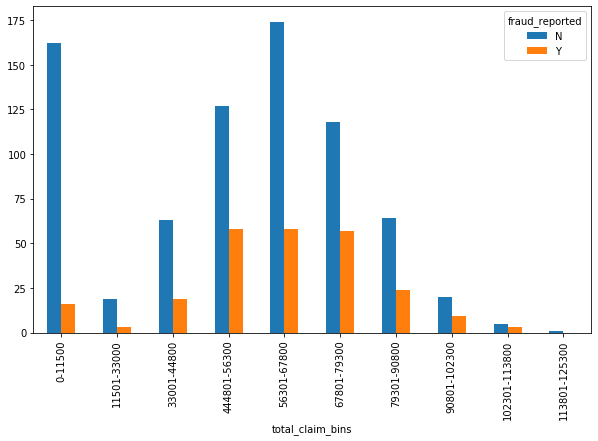

In [24]:
total_claim_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [25]:
#Analyzing fraud reporting gender wise

gender_wise_fraud = pd.crosstab(data.insured_sex, data.fraud_reported)
gender_wise_fraud

fraud_reported,N,Y
insured_sex,,
FEMALE,411,126
MALE,342,121


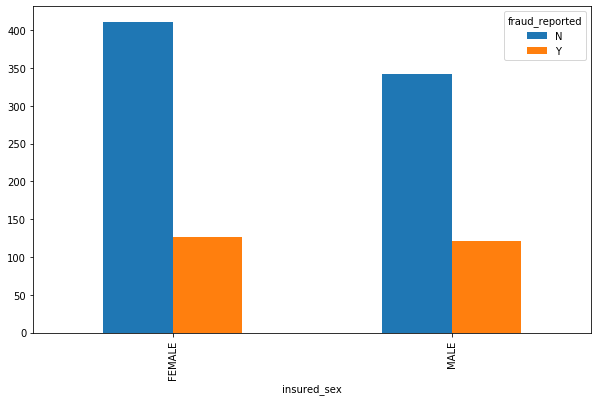

In [26]:
gender_wise_fraud.plot(kind = 'bar', figsize = (10,6))

In [27]:
#relationship b/w policy_annual_premium v/s fraud_reported
print(data.policy_annual_premium.min())
print(data.policy_annual_premium.max())

433.33
2047.59


In [28]:
data['policy_premium_bins'] = pd.cut(data.policy_annual_premium, bins = [0, 500, 1000, 1500, 2000], include_lowest = True, labels = ['0-500','501-1000','1001-1500','1501-2000'])

In [29]:
policy_premium_vs_fraud = pd.crosstab(data.policy_premium_bins, data.fraud_reported)
policy_premium_vs_fraud

fraud_reported,N,Y
policy_premium_bins,,
0-500,1,1
501-1000,107,44
1001-1500,529,164
1501-2000,115,38


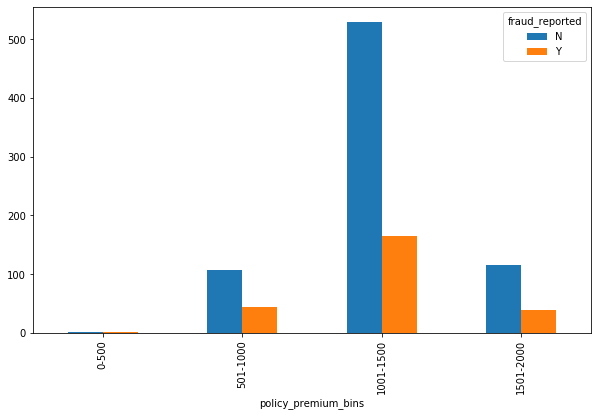

In [30]:
policy_premium_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [31]:
#It is clearly visible that fraud reporting is highly dependent on policy premium amount.

In [32]:
data[['policy_state', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']].describe()

,policy_state,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted
count,1000,1000,1000,1000,1000,1000,1000
unique,3,7,14,4,3,4,5
top,OH,JD,machine-op-inspct,Multi-vehicle Collision,Rear Collision,Minor Damage,Police
freq,352,161,93,419,470,354,292


In [33]:
#Dropping some data 
data.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim','age_bins', 'total_claim_bins', 'policy_premium_bins'], axis = 1, inplace = True)

In [34]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,Major Damage,5,1,1,2,YES,71610,2004,Y
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,Minor Damage,8,1,0,0,NO,5070,2007,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,Minor Damage,7,3,2,3,NO,34650,2007,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,Major Damage,5,1,1,2,NO,63400,2014,Y
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,Minor Damage,20,1,0,1,NO,6500,2009,N


In [35]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
collision_type                  object
incident_severity               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
dtype: object

In [36]:
#convert all categorical variable to numerical

data_onehot = data[['policy_state','insured_sex', 'collision_type', 'incident_severity', 'police_report_available']]

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)
enc.fit(data_onehot)
data_onehot_transformed = enc.transform(data_onehot)


In [38]:
data_onehot_transformed

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [39]:
data_onehot_transformed.shape

(1000, 14)

In [40]:
columns = ['OH', 'IN', 'IL', 'Insured_Male', 'Insured_Female','Side_Collison','Rear _Collison','Front Collison',
         'Major Damage','Minor Damage','Total Loss','Trivial Damage''Police Report available', 'Police report not available']

In [41]:
# Converting returned array into a DataFrame
data2 = pd.DataFrame(data_onehot_transformed, columns = ['OH', 'IN', 'IL', 'Insured_Male', 'Insured_Female', 'Side_Collison','Rear _Collison','Front Collison', 'Major Damage','Minor Damage','Total Loss','Trivial Damage', 'Police Report available', 'Police report not available'])

In [42]:
data2.head()

,OH,IN,IL,Insured_Male,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
#concatinating data
data = pd.concat([data, data2], axis = 1)

In [44]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:

data.drop(['policy_state','insured_sex','collision_type', 'incident_severity','police_report_available'], axis = 1, inplace = True)

In [46]:
#null value chk
data.isna().sum()

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
auto_year                      0
fraud_reported                 0
OH                             0
IN                             0
IL                             0
Insured_Male                   0
Insured_Female                 0
Side_Collison                  0
Rear _Collison                 0
Front Collison                 0
Major Damage                   0
Minor Damage                   0
Total Loss                     0
Trivial Damage                 0
Police Report available        0
Police report not available    0
dtype: int64

In [47]:
data['fraud_reported'] = data['fraud_reported'].replace({'Y': 1, 'N': 0})
data['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [48]:

X = data.drop('fraud_reported', axis= 1)
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
y = data['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False, random_state=4 )
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 27) (700,)
Test set: (300, 27) (300,)


In [52]:
#Modelling Decision tree
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
loanTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
ypred_tree = loanTree.predict(X_test)
ypred_tree[0:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import f1_score
acc_f1_dt = f1_score(ypred_tree, y_test, average ='weighted').round(2)
acc_f1_dt

0.81

In [58]:
ypred_tree_logloss = loanTree.predict_proba(X_test)[:,1]
ypred_tree_logloss[0:10]

array([1.        , 0.65517241, 0.19512195, 0.        , 0.5875    ,
       0.3       , 0.1372549 , 0.19512195, 0.        , 0.1372549 ])

In [59]:
y_test[:15]

700    1
701    1
702    0
703    1
704    1
705    1
706    0
707    1
708    1
709    1
710    1
711    0
712    1
713    1
714    0
Name: fraud_reported, dtype: int64

In [61]:
from sklearn.metrics import log_loss
acc_logloss_dt = log_loss(y_test, ypred_tree_logloss, eps=1e-15, normalize = True).round(2)
acc_logloss_dt

2.73

In [62]:
#LOGISTIC REGRESSION MODELLING
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.01, solver = 'liblinear')
LR.fit(X_train, y_train)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
ypred_logreg = LR.predict(X_test)
ypred_logreg[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
acc_f1_LR = f1_score(ypred_logreg, y_test, average ='weighted').round(2)
acc_f1_LR

0.86

In [65]:
# Predicting probailities for Log loss
ypred_logreg_logloss = LR.predict_proba(X_test)[:,1]
ypred_logreg_logloss[0:10]

array([0.37539227, 0.19691348, 0.1295353 , 0.26196546, 0.20596846,
       0.23904115, 0.32140373, 0.33933059, 0.31214382, 0.24582144])

In [66]:
acc_logloss_LR = log_loss(y_test, ypred_logreg, eps=1e-15, normalize = True).round(2)
acc_logloss_LR

8.29

In [73]:
#RANDOM FOREST CLASSIFER
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
yhat_rf = random_forest.predict(X_test)

In [75]:
acc_rf= round(random_forest.score(X_train, y_train)* 100, 2)
acc_rf
#ACCURACY FOR TRAIN DATA

100.0

In [76]:
acc_rf_test= round(random_forest.score(X_test, y_test)* 100, 2)
acc_rf_test
#ACCURACY FOR TEST DATA

78.33